In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
df = pd.read_csv("spam.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


__Data Exploration__

In [2]:
df.groupby('Category').describe() # The y being a text we cannot use value_counts() or mean(). Instead using describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

__Dummy Variable for y values__

In [3]:
dummies = pd.get_dummies(df.Category) #getting the dummy dataframe for category column
dummies.head() 

,ham,spam
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [4]:
df= pd.concat([df,dummies],axis = 'columns') # concatenating dataframes
df.head()

,Category,Message,ham,spam
0,ham,"Go until jurong point, crazy.. Available only ...",1,0
1,ham,Ok lar... Joking wif u oni...,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,ham,U dun say so early hor... U c already then say...,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,0


In [5]:
df = df.drop(['Category','ham'], axis = 'columns') # dropiing the unwanted columns
df

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,1
5568,Will ü b going to esplanade fr home?,0
5569,"Pity, * was in mood for that. So...any other s...",0
5570,The guy did some bitching but I acted like i'd...,0


__Using count vectorizer__

Converting message column to counts. Each unique word is arranged in a column and its occurance in that particular row/line is filled in the cell.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [7]:
X=v.fit_transform(df.Message)

In [8]:
X

<5572x8709 sparse matrix of type '<class 'numpy.int64'>'
	with 74098 stored elements in Compressed Sparse Row format>

In [9]:
type(X)

scipy.sparse.csr.csr_matrix

In [10]:
X = X.toarray() # Converting scipy sparse X to numpy array. If not converted then train test split returns scipy arrays.

In [11]:
type(X) #converted to numpy

numpy.ndarray

In [12]:
X.shape #(rows,number of unique words)

(5572, 8709)

In [13]:
X[:2] # viewing X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

__Train test splitting__

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.spam,test_size=0.2) # (flattened 2d array,1d array)

In [15]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4457, 1115, 4457, 1115)

__Multinomial Naive Bayes__

In [16]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [17]:
model.fit(X_train,y_train)

MultinomialNB()

In [18]:
model.score(X_test,y_test)

0.979372197309417

In [19]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [20]:
model.predict_proba(X_test)

array([[9.99595655e-01, 4.04345284e-04],
       [9.99996209e-01, 3.79055938e-06],
       [1.00000000e+00, 4.34586332e-12],
       ...,
       [9.99929724e-01, 7.02763473e-05],
       [1.00000000e+00, 1.31127139e-14],
       [1.00000000e+00, 4.67410189e-17]])

__Confusion_Matrix__

Text(1.5, 0.5, 'True')

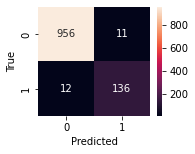

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure (figsize =(2.5,2))
sn.heatmap(cm, annot = True,fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("True")

__Predicting score using Cross Validation Technique__

In [22]:
from sklearn.model_selection import cross_val_score  # default n_splits= 5.Train test split is not required for C-validation
cross_val_score(model,X,df.spam) # (splits into train and test data internally, and gives the score.)
# Details explained in Cross validation Folder

array([0.97847534, 0.9793722 , 0.97845601, 0.98114901, 0.97935368])

In [23]:
np.mean(cross_val_score(model,X,df.spam)) # Mean of the above scores.

0.9793612481986298

__Manually providing sample to predict ham /spam__

In [24]:
emails = ['Hey mohan, can we get together to watch football game tomorrow?',
         'upto 20% discount on parking, exclusive offer just for you. Dont miss the reward!',
         'Hey, this offer is suitable for you. Avail it before the expiry.Hurry, hurry, hurry!',
         'Free entry',
         'Free money. Urgent cashback']
vec_emails= v.transform(emails)

In [25]:
model.predict(vec_emails)

array([0, 1, 0, 1, 1], dtype=uint8)

__Using sklearn pipeline__

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Message,df.spam,test_size=0.2) # (flattened 2d array,1d array)

In [27]:
X_train

4831    The word "Checkmate" in chess comes from the P...
1079                             Convey my regards to him
519     That way transport is less problematic than on...
3491    Huh but i got lesson at 4 lei n i was thinkin ...
77      I like you peoples very much:) but am very shy...
                              ...                        
1940    More people are dogging in your area now. Call...
3005    You've won tkts to the EURO2004 CUP FINAL or £...
507     Maybe westshore or hyde park village, the plac...
4895                             Convey my regards to him
364     Busy here. Trying to finish for new year. I am...
Name: Message, Length: 4457, dtype: object

In [28]:
type(X_train)

pandas.core.series.Series

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()

In [30]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [31]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [32]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [33]:
clf.score(X_test,y_test)

0.9838565022421525

In [34]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [35]:
clf.predict(emails) #clf is working properly for external data as well.

array([0, 1, 0, 1, 1], dtype=uint8)